### Faculdade de Engenharia Industrial - FEI

### Centro Universitário da Fundação Educacional Inaciana "Padre Sabóia de Medeiros" (FEI)


*FEI's Stricto Sensu Graduate Program in Electrical Engineering*

Concentration area: ARTIFICIAL INTELLIGENCE APPLIED TO AUTOMATION AND ROBOTICS

Master's thesis student Andre Luiz Florentino

***

# Chapter 16: Experiments indoor

Assumption: one has to run the MT_ESR.py in the Raspberry Pi using live audio and copy the files to their class folder.
See example below:

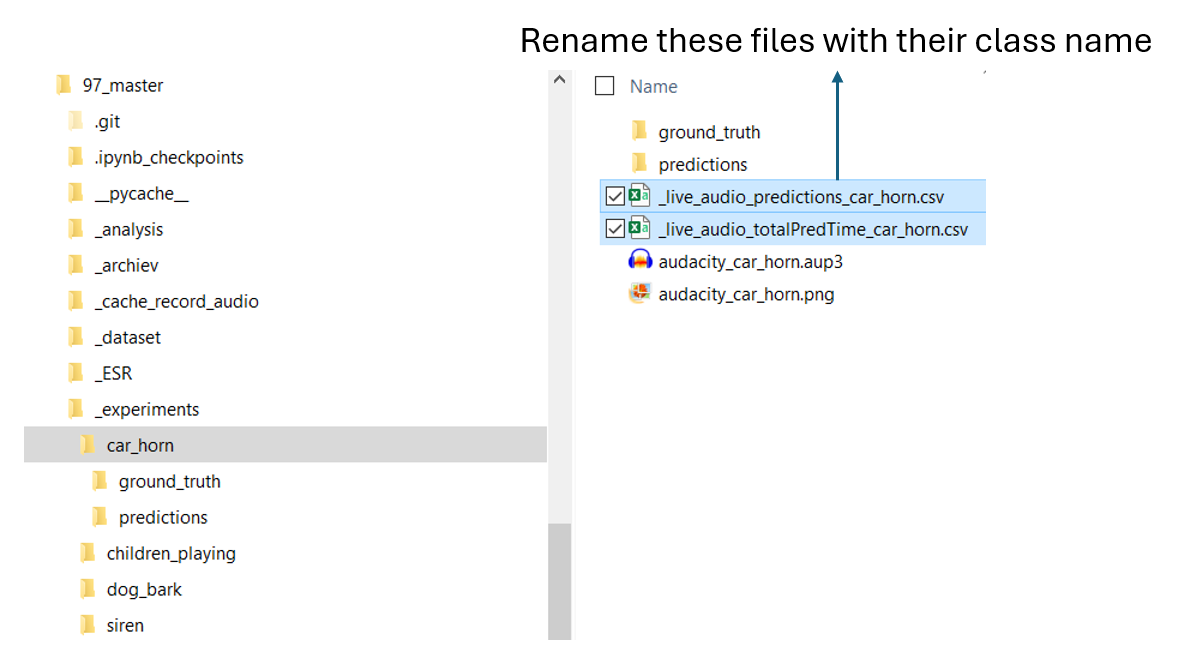

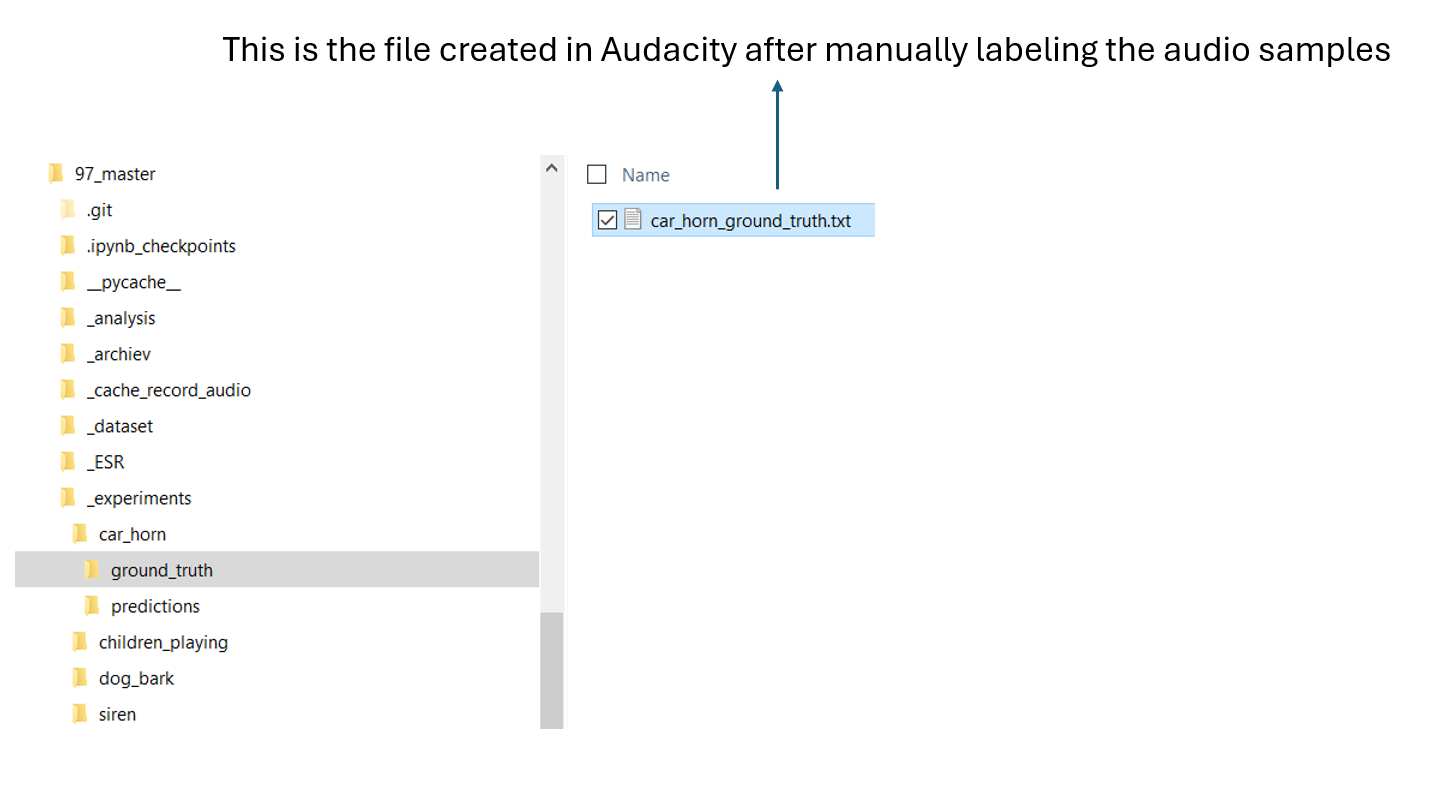

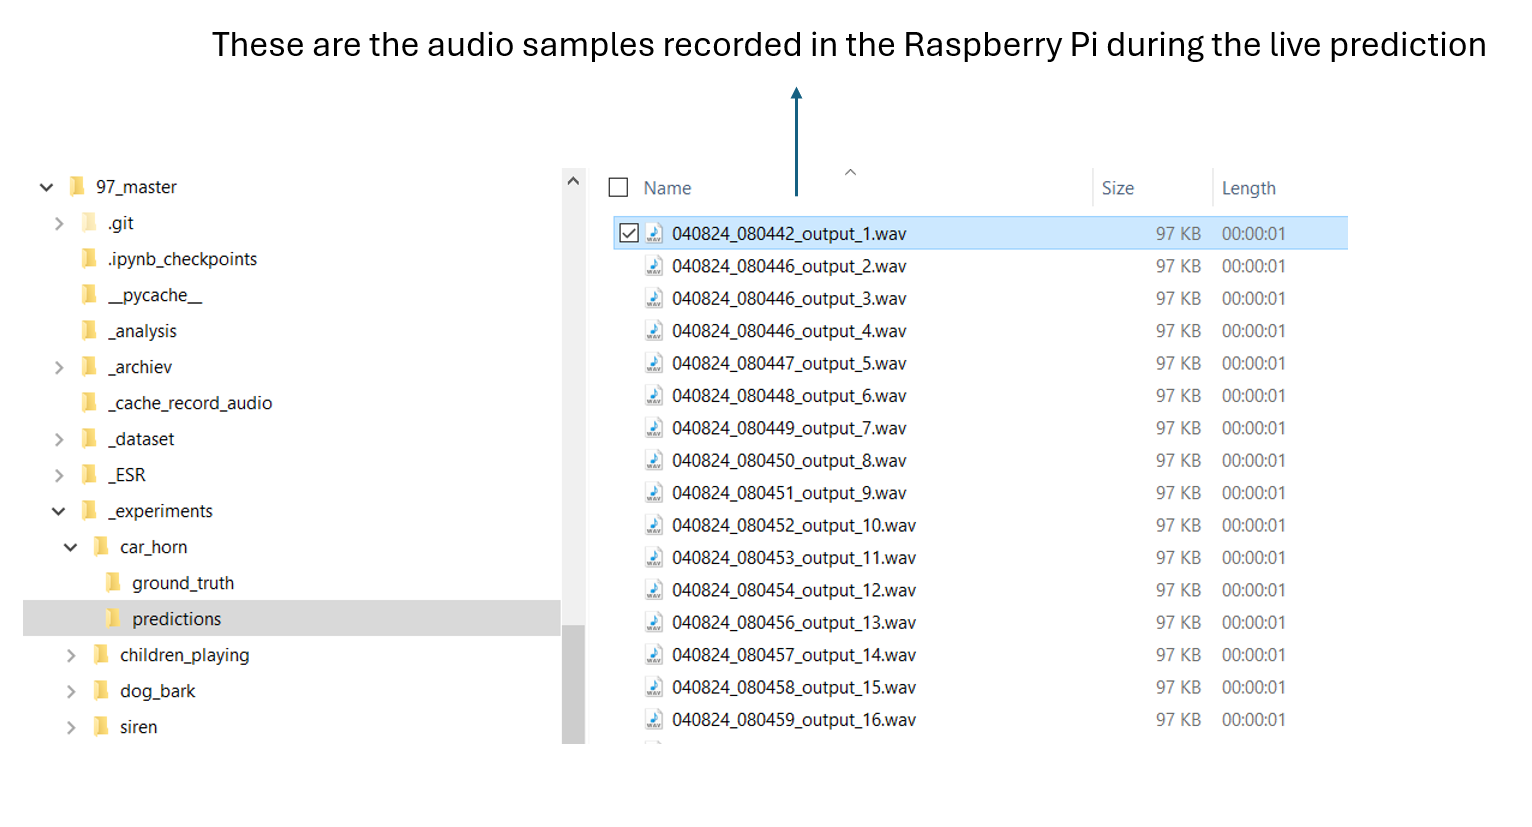
***

## Import modules

In [1]:
import csv
import re
import os
import librosa

import pandas  as pd
import numpy   as np
import seaborn as sns

from sklearn     import metrics
from collections import Counter
from matplotlib  import pyplot as plt

from MT_ESR_evaluation_tflite import ESR_evaluation_tflite

pd.set_option('display.max_columns', 9)
pd.set_option('display.width', 300)
pd.set_option('display.max_colwidth', 120)

In [2]:
# Globals
cmap_cm   = plt.cm.Blues

current_path = os.getcwd()

# For the picture names
pic_first_name = '16_Experiments_indoor_'

# Folder for the predictive models
path_modelsVal = os.path.join(current_path, "_ESR", "Saved_models_fold_1_validation")
path_arrays    = os.path.join(current_path, "_ESR", "Arrays")

# Folder for this notebook
path_experiments  = os.path.join(current_path, "_experiments")

# Check if the folder exists, if not, create it
if not os.path.exists(path_experiments):
    os.makedirs(path_experiments)

# DOG BARK    
path_exp_dog_bark          = os.path.join(current_path, "_experiments", "dog_bark")
path_ground_truth_dog_barg = os.path.join(path_exp_dog_bark, "ground_truth")
path_predictions_dog_bark  = os.path.join(path_exp_dog_bark, "predictions")

# Check if the folder exists, if not, create it
if not os.path.exists(path_exp_dog_bark):
    os.makedirs(path_exp_dog_bark)

# Check if the folder exists, if not, create it
if not os.path.exists(path_ground_truth_dog_barg):
    os.makedirs(path_ground_truth_dog_barg)
    
# Check if the folder exists, if not, create it
if not os.path.exists(path_predictions_dog_bark):
    os.makedirs(path_predictions_dog_bark)    
    

# CHILDREN PLAYING
path_exp_children          = os.path.join(current_path, "_experiments", "children_playing")
path_ground_truth_children = os.path.join(path_exp_children, "ground_truth")
path_predictions_children  = os.path.join(path_exp_children, "predictions")

# Check if the folder exists, if not, create it
if not os.path.exists(path_exp_children):
    os.makedirs(path_exp_children)

# Check if the folder exists, if not, create it
if not os.path.exists(path_ground_truth_children):
    os.makedirs(path_ground_truth_children)
    
# Check if the folder exists, if not, create it
if not os.path.exists(path_predictions_children):
    os.makedirs(path_predictions_children) 


#SIREN
path_exp_siren          = os.path.join(current_path, "_experiments", "siren")
path_ground_truth_siren = os.path.join(path_exp_siren, "ground_truth")
path_predictions_siren  = os.path.join(path_exp_siren, "predictions")

# Check if the folder exists, if not, create it
if not os.path.exists(path_exp_siren):
    os.makedirs(path_exp_siren)

# Check if the folder exists, if not, create it
if not os.path.exists(path_ground_truth_siren):
    os.makedirs(path_ground_truth_siren)
    
# Check if the folder exists, if not, create it
if not os.path.exists(path_predictions_siren):
    os.makedirs(path_predictions_siren) 
    

#CAR HORN
path_exp_car_horn          = os.path.join(current_path, "_experiments", "car_horn")
path_ground_truth_car_horn = os.path.join(path_exp_car_horn, "ground_truth")
path_predictions_car_horn  = os.path.join(path_exp_car_horn, "predictions")

# Check if the folder exists, if not, create it
if not os.path.exists(path_exp_car_horn):
    os.makedirs(path_exp_car_horn)

# Check if the folder exists, if not, create it
if not os.path.exists(path_ground_truth_car_horn):
    os.makedirs(path_ground_truth_car_horn)
    
# Check if the folder exists, if not, create it
if not os.path.exists(path_predictions_car_horn):
    os.makedirs(path_predictions_car_horn) 
    

nom_classes = []
with open(os.path.join(current_path, '_ESR', 'Arrays', 'nom_classes.csv'), 'r') as file:
    for line in file:
        nom_classes.append(line.strip())

In [3]:
nom_classes

['background', 'car_horn', 'children_playing', 'dog_bark', 'silence', 'siren']

In [4]:
def get_next_file_number(folder: str):
    files = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f)) and f.startswith(pic_first_name)]
    if not files:
        return 1
    else:
        numbers = [int(f.split('.')[0].split('_')[-1]) for f in files]
        return max(numbers) + 1

In [5]:
# Simple confusion matrix

def simple_conf_matrix(y_true, y_pred, esr_class, nom_classes, acc):
    
    picture_name = f'{pic_first_name}{get_next_file_number(path_experiments):02d}.png'
    
    conf_matrix = metrics.confusion_matrix(y_true, y_pred)
    title = esr_class + ' - F1 score weighted average: '+ str("{:0.2f} %".format(acc*100))

    plt.figure(figsize = (10,10))
    sns.heatmap(conf_matrix, 
                annot=True, 
                fmt='g', 
                cmap=cmap_cm, 
                annot_kws={"size": 14}, 
                xticklabels=nom_classes, 
                yticklabels=nom_classes)
    plt.title(title, fontsize = 16)
    plt.savefig(os.path.join(path_experiments, picture_name))
    plt.show()

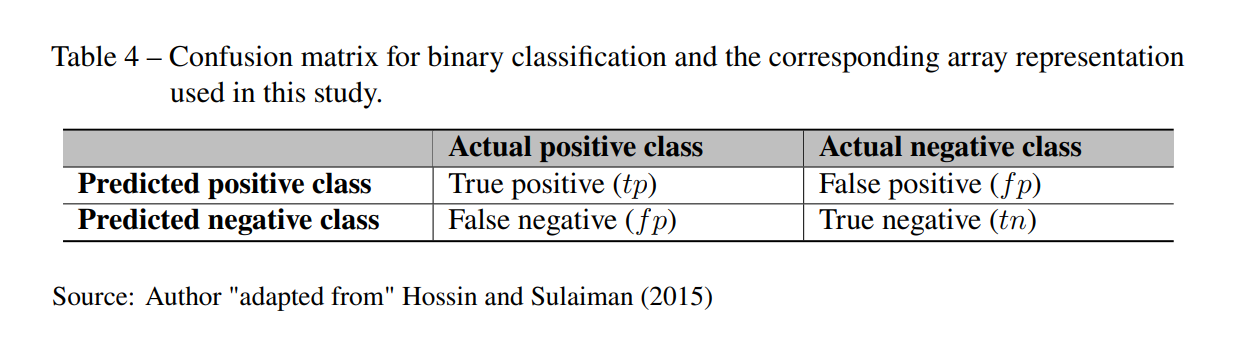

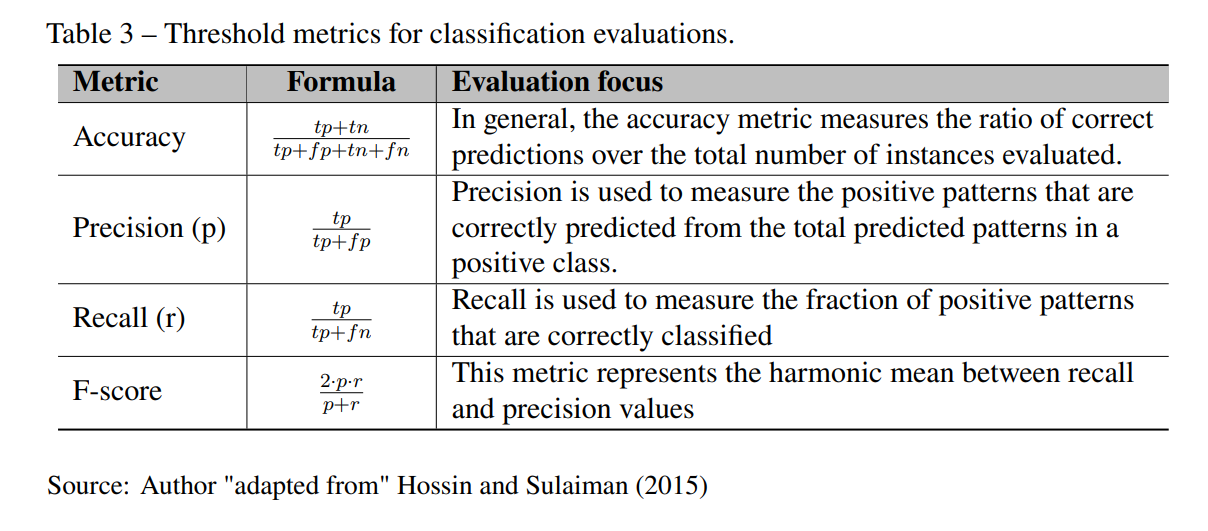

## dog_bark - Ground truth from Audacity

**Manually labeled**

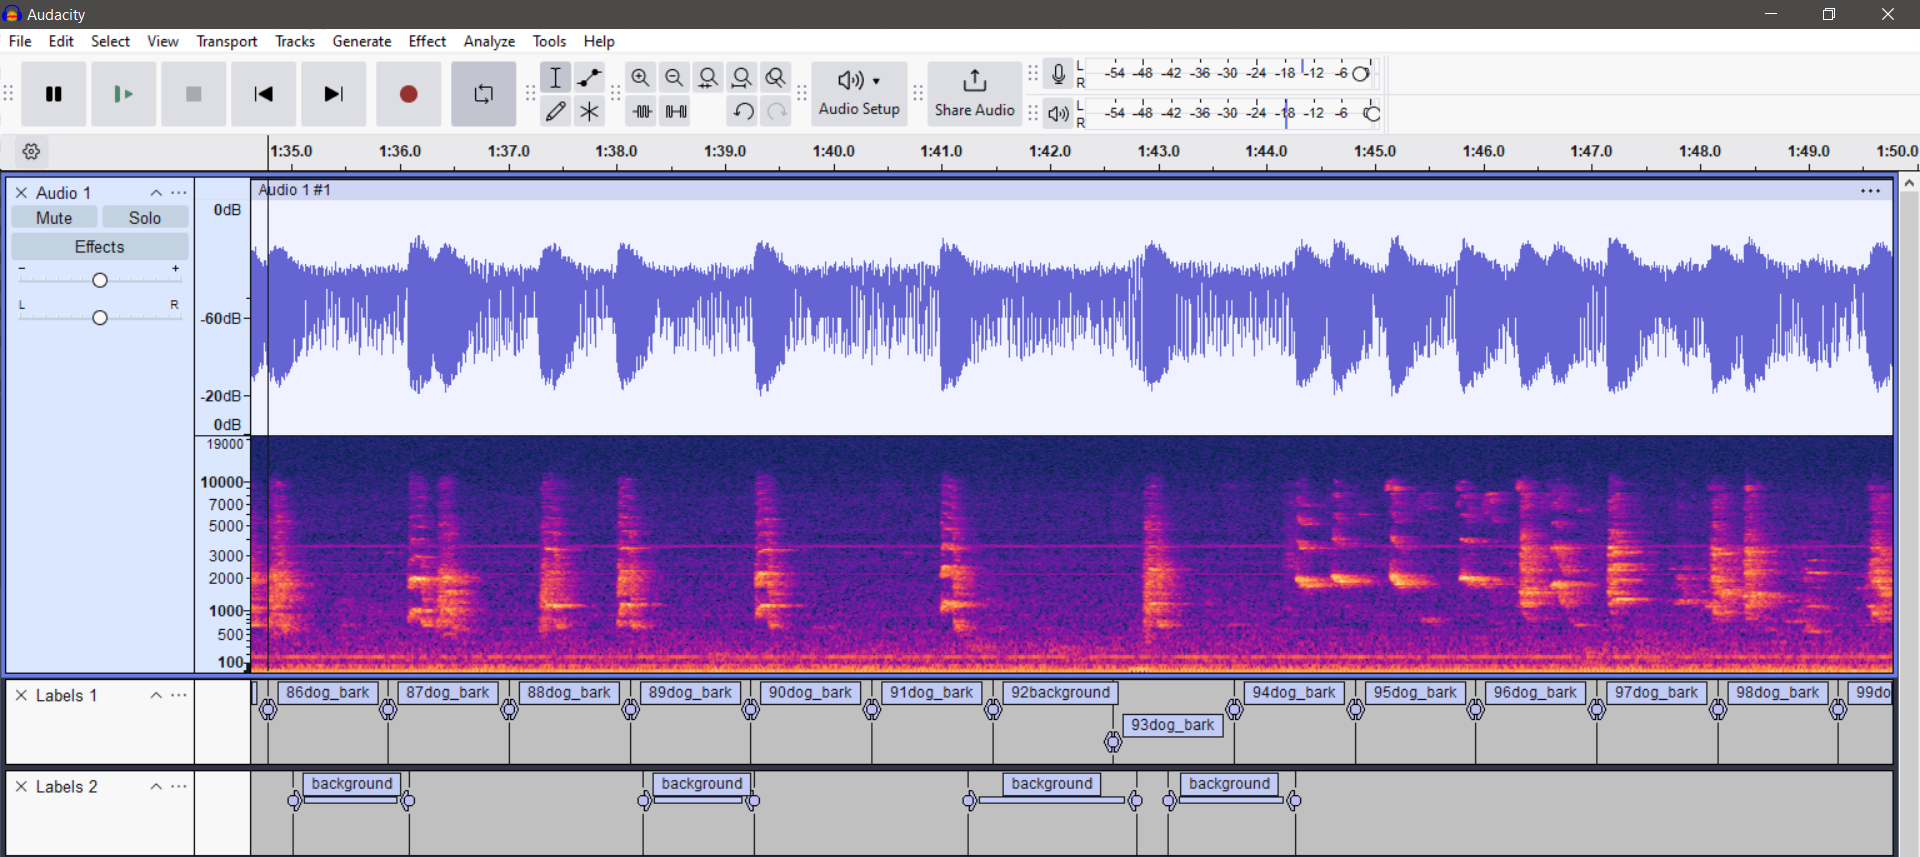

In [6]:
db_dog = pd.read_csv(os.path.join(path_exp_dog_bark, 'ground_truth', 'dog_bark_ground_truth.txt'), sep=",")
db_dog

start      end ground_truth
0      0.000    0.000   01dog_bark
1      1.115    1.115   02dog_bark
2      2.230    2.230   03dog_bark
3      3.345    3.345   04dog_bark
4      4.460    4.460   05dog_bark
..       ...      ...          ...
102  113.730  113.730  103dog_bark
103  114.845  114.845  104dog_bark
104  115.960  115.960  105dog_bark
105  117.075  117.075  106dog_bark
106  118.190  118.190  107dog_bark

[107 rows x 3 columns]

In [7]:
db_dog['ground_truth'] = db_dog['ground_truth'].apply(lambda x: re.sub(r'\d+', '', x))
db_dog

start      end ground_truth
0      0.000    0.000     dog_bark
1      1.115    1.115     dog_bark
2      2.230    2.230     dog_bark
3      3.345    3.345     dog_bark
4      4.460    4.460     dog_bark
..       ...      ...          ...
102  113.730  113.730     dog_bark
103  114.845  114.845     dog_bark
104  115.960  115.960     dog_bark
105  117.075  117.075     dog_bark
106  118.190  118.190     dog_bark

[107 rows x 3 columns]

In [8]:
dog_ground_truth = db_dog['ground_truth'].tolist()
dog_ground_truth

['dog_bark',
 'dog_bark',
 'dog_bark',
 'dog_bark',
 'dog_bark',
 'dog_bark',
 'dog_bark',
 'dog_bark',
 'dog_bark',
 'dog_bark',
 'dog_bark',
 'dog_bark',
 'dog_bark',
 'dog_bark',
 'dog_bark',
 'dog_bark',
 'dog_bark',
 'dog_bark',
 'background',
 'dog_bark',
 'dog_bark',
 'dog_bark',
 'dog_bark',
 'background',
 'dog_bark',
 'dog_bark',
 'dog_bark',
 'dog_bark',
 'dog_bark',
 'dog_bark',
 'dog_bark',
 'dog_bark',
 'dog_bark',
 'dog_bark',
 'dog_bark',
 'dog_bark',
 'background',
 'background',
 'dog_bark',
 'dog_bark',
 'dog_bark',
 'background',
 'background',
 'background',
 'dog_bark',
 'background',
 'dog_bark',
 'dog_bark',
 'background',
 'background',
 'dog_bark',
 'background',
 'dog_bark',
 'dog_bark',
 'dog_bark',
 'dog_bark',
 'dog_bark',
 'dog_bark',
 'dog_bark',
 'dog_bark',
 'dog_bark',
 'dog_bark',
 'dog_bark',
 'background',
 'dog_bark',
 'dog_bark',
 'dog_bark',
 'dog_bark',
 'dog_bark',
 'dog_bark',
 'dog_bark',
 'dog_bark',
 'dog_bark',
 'dog_bark',
 'dog_bark',
 

In [9]:
dog_ground_truth[0]

'dog_bark'

In [10]:
len(dog_ground_truth)

107

## dog_bark - Predictions from the ESR algorithm

In [11]:
with open(os.path.join(path_exp_dog_bark, '_live_audio_predictions_dog_bark.csv'), newline='') as f:
    reader   = csv.reader(f)
    data     = list(reader)
    data     = data[0]
    dog_pred = [element.strip("'") for element in data]
       
    # Normalize the number of samples predicted based on the ground truth data
    if len(dog_pred) > len(dog_ground_truth):
        del dog_pred[-(len(dog_pred)-len(dog_ground_truth)):]
    elif len(dog_pred) == len(dog_ground_truth):
        pass
    else:
        print(f'Ground truth has more samples ({len(dog_ground_truth)}) than prediction samples ({len(dog_pred)})')
        print('\nCheck the data.\n')

print(dog_pred)

['dog_bark', 'dog_bark', 'dog_bark', 'background', 'children_playing', 'children_playing', 'children_playing', 'dog_bark', 'dog_bark', 'dog_bark', 'dog_bark', 'dog_bark', 'children_playing', 'dog_bark', 'dog_bark', 'dog_bark', 'dog_bark', 'dog_bark', 'background', 'dog_bark', 'dog_bark', 'dog_bark', 'dog_bark', 'dog_bark', 'dog_bark', 'children_playing', 'children_playing', 'dog_bark', 'children_playing', 'children_playing', 'children_playing', 'children_playing', 'background', 'dog_bark', 'children_playing', 'dog_bark', 'background', 'background', 'dog_bark', 'background', 'dog_bark', 'background', 'background', 'background', 'dog_bark', 'background', 'dog_bark', 'dog_bark', 'background', 'background', 'dog_bark', 'background', 'dog_bark', 'background', 'dog_bark', 'background', 'dog_bark', 'dog_bark', 'dog_bark', 'dog_bark', 'dog_bark', 'dog_bark', 'dog_bark', 'background', 'children_playing', 'background', 'children_playing', 'dog_bark', 'children_playing', 'children_playing', 'dog_

In [12]:
len(dog_pred)

107

## dog_bark - Classification report

In [13]:
list_unique_truth = set(dog_ground_truth)
list_unique_pred  = set(dog_pred)
print(list_unique_truth)
print(list_unique_pred)

{'dog_bark', 'background'}
{'dog_bark', 'children_playing', 'background'}


In [14]:
nom_classes_dog = sorted(list(list_unique_pred.union(list_unique_truth)))
 
print("The resultant merged list is ")
print(nom_classes_dog)

The resultant merged list is 
['background', 'children_playing', 'dog_bark']


In [15]:
dog1 = Counter(dog_ground_truth)
dog1

Counter({'dog_bark': 93, 'background': 14})

In [16]:
dog2 = Counter(dog_pred)
dog2

Counter({'dog_bark': 62, 'background': 20, 'children_playing': 25})

In [17]:
dog_bark_class_report = metrics.classification_report(dog_ground_truth, 
                                                      dog_pred,
                                                      output_dict   = False,
                                                      zero_division = 0)
print(dog_bark_class_report)

                  precision    recall  f1-score   support

      background       0.60      0.86      0.71        14
children_playing       0.00      0.00      0.00         0
        dog_bark       0.97      0.65      0.77        93

        accuracy                           0.67       107
       macro avg       0.52      0.50      0.49       107
    weighted avg       0.92      0.67      0.77       107



In [18]:
dog_bark_class_report = metrics.classification_report(dog_ground_truth, 
                                                      dog_pred,
                                                      output_dict  = True,
                                                      zero_division = 0)
dog_bark_class_report_f1 = dog_bark_class_report['weighted avg']['f1-score']
print(dog_bark_class_report_f1)

0.765255634964266


In [19]:
metrics.confusion_matrix(dog_ground_truth, dog_pred)

array([[12,  0,  2],
       [ 0,  0,  0],
       [ 8, 25, 60]], dtype=int64)

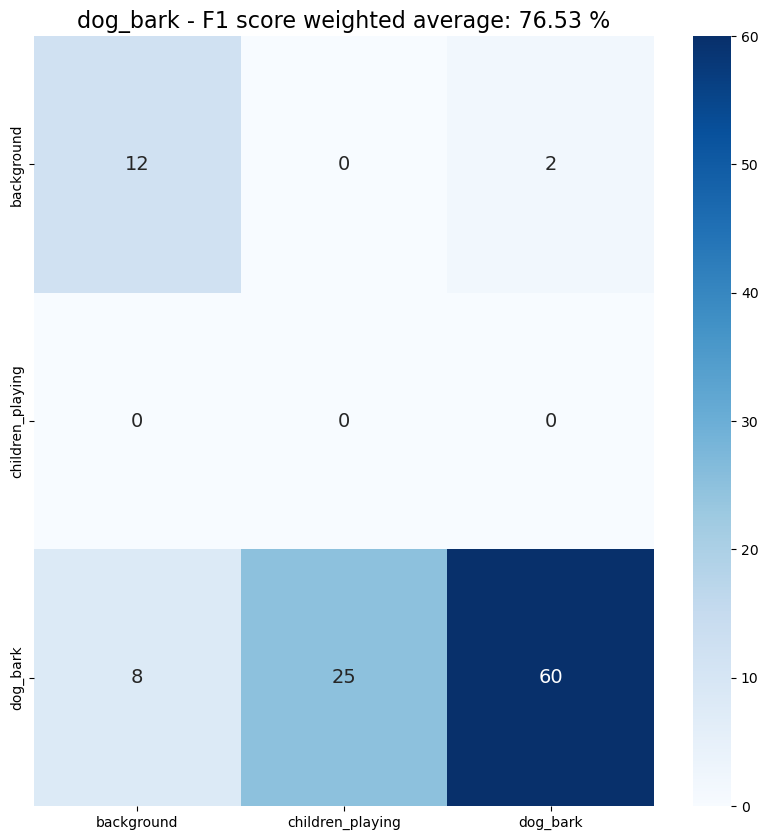

In [20]:
simple_conf_matrix(dog_ground_truth, 
                   dog_pred, 
                   'dog_bark',
                   nom_classes_dog,
                   dog_bark_class_report_f1)

### Checking the predictions on notebook using the audios recorded during live prediction

In [21]:
def pred_audio(path_prediction: str):
    
    pred_signal = []
    pred_audio  = sorted(next(os.walk(path_prediction))[2])
    
    del pred_audio[-(len(pred_audio)-107):]
    print(f'Number of audio samples...: {len(pred_audio)}\n')
    
    for  index, audio in enumerate(pred_audio):
        audio_temp,_ = librosa.load(os.path.join(path_prediction, audio), sr = 22050)
        pred_signal.append(audio_temp)
        print(f'File name: {audio}')
        print(f'Audio sample {index+1} duration: {librosa.get_duration(y=audio_temp)} s\n')
    
    return pred_signal

In [22]:
dog_audio = pred_audio(path_predictions_dog_bark)

Number of audio samples...: 107

File name: 030824_092700_output_1.wav
Audio sample 1 duration: 1.1145578231292517 s

File name: 030824_092704_output_2.wav
Audio sample 2 duration: 1.1145578231292517 s

File name: 030824_092704_output_3.wav
Audio sample 3 duration: 1.1145578231292517 s

File name: 030824_092704_output_4.wav
Audio sample 4 duration: 1.1145578231292517 s

File name: 030824_092705_output_5.wav
Audio sample 5 duration: 1.1145578231292517 s

File name: 030824_092706_output_6.wav
Audio sample 6 duration: 1.1145578231292517 s

File name: 030824_092707_output_7.wav
Audio sample 7 duration: 1.1145578231292517 s

File name: 030824_092708_output_8.wav
Audio sample 8 duration: 1.1145578231292517 s

File name: 030824_092709_output_9.wav
Audio sample 9 duration: 1.1145578231292517 s

File name: 030824_092710_output_10.wav
Audio sample 10 duration: 1.1145578231292517 s

File name: 030824_092711_output_11.wav
Audio sample 11 duration: 1.1145578231292517 s

File name: 030824_092713_out

File name: 030824_092851_output_100.wav
Audio sample 100 duration: 1.1145578231292517 s

File name: 030824_092852_output_101.wav
Audio sample 101 duration: 1.1145578231292517 s

File name: 030824_092853_output_102.wav
Audio sample 102 duration: 1.1145578231292517 s

File name: 030824_092854_output_103.wav
Audio sample 103 duration: 1.1145578231292517 s

File name: 030824_092855_output_104.wav
Audio sample 104 duration: 1.1145578231292517 s

File name: 030824_092856_output_105.wav
Audio sample 105 duration: 1.1145578231292517 s

File name: 030824_092857_output_106.wav
Audio sample 106 duration: 1.1145578231292517 s

File name: 030824_092858_output_107.wav
Audio sample 107 duration: 1.1145578231292517 s



In [23]:
dog_audio[0]

array([ 0.04862345, -0.07118186, -0.02798858, ...,  0.02733501,
        0.0255861 ,  0.03436095], dtype=float32)

In [24]:
print(np.array(dog_audio).shape)

(107, 24576)


In [101]:
# Checking the previous results for the CNN 2D model considering all audio samples.

ESR_EVAL          = ESR_evaluation_tflite(dog_audio[0:len(dog_audio)], 'CNN2D', path_modelsVal, path_arrays)
predictions_dog   = np.array(ESR_EVAL.predictions)
totalPredTime_dog = np.array(ESR_EVAL.totalPredTime)

Audio clip...........: 1
Prediction...........: dog_bark
Total predict time:..: 15.3474ms

Audio clip...........: 2
Prediction...........: dog_bark
Total predict time:..: 12.4662ms

Audio clip...........: 3
Prediction...........: dog_bark
Total predict time:..: 11.9300ms

Audio clip...........: 4
Prediction...........: background
Total predict time:..: 11.4570ms

Audio clip...........: 5
Prediction...........: children_playing
Total predict time:..: 9.8167ms

Audio clip...........: 6
Prediction...........: children_playing
Total predict time:..: 11.1741ms

Audio clip...........: 7
Prediction...........: children_playing
Total predict time:..: 12.0376ms

Audio clip...........: 8
Prediction...........: dog_bark
Total predict time:..: 9.5118ms

Audio clip...........: 9
Prediction...........: dog_bark
Total predict time:..: 9.2404ms

Audio clip...........: 10
Prediction...........: dog_bark
Total predict time:..: 13.9199ms

Audio clip...........: 11
Prediction...........: dog_bark
Total pr

Audio clip...........: 96
Prediction...........: dog_bark
Total predict time:..: 12.4342ms

Audio clip...........: 97
Prediction...........: children_playing
Total predict time:..: 12.8374ms

Audio clip...........: 98
Prediction...........: children_playing
Total predict time:..: 13.4572ms

Audio clip...........: 99
Prediction...........: dog_bark
Total predict time:..: 9.9388ms

Audio clip...........: 100
Prediction...........: children_playing
Total predict time:..: 11.6225ms

Audio clip...........: 101
Prediction...........: children_playing
Total predict time:..: 12.0847ms

Audio clip...........: 102
Prediction...........: dog_bark
Total predict time:..: 15.1031ms

Audio clip...........: 103
Prediction...........: children_playing
Total predict time:..: 12.7434ms

Audio clip...........: 104
Prediction...........: children_playing
Total predict time:..: 10.5356ms

Audio clip...........: 105
Prediction...........: background
Total predict time:..: 13.2475ms

Audio clip...........: 10

In [26]:
predictions_dog

array([3, 3, 3, 0, 2, 2, 2, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 0, 3, 3, 3,
       3, 3, 3, 2, 2, 3, 2, 2, 2, 2, 0, 3, 2, 3, 0, 0, 3, 0, 3, 0, 0, 0,
       3, 0, 3, 3, 0, 0, 3, 0, 3, 0, 3, 0, 3, 3, 3, 3, 3, 3, 3, 0, 2, 0,
       2, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 3, 3, 3, 3, 3, 3, 2, 3,
       3, 3, 2, 3, 3, 3, 3, 3, 2, 2, 3, 2, 2, 3, 2, 2, 0, 2, 2],
      dtype=int64)

In [27]:
nom_classes

['background', 'car_horn', 'children_playing', 'dog_bark', 'silence', 'siren']

In [28]:
predictions_dog_cat = np.array(nom_classes)[predictions_dog]
predictions_dog_cat

array(['dog_bark', 'dog_bark', 'dog_bark', 'background',
       'children_playing', 'children_playing', 'children_playing',
       'dog_bark', 'dog_bark', 'dog_bark', 'dog_bark', 'dog_bark',
       'children_playing', 'dog_bark', 'dog_bark', 'dog_bark', 'dog_bark',
       'dog_bark', 'background', 'dog_bark', 'dog_bark', 'dog_bark',
       'dog_bark', 'dog_bark', 'dog_bark', 'children_playing',
       'children_playing', 'dog_bark', 'children_playing',
       'children_playing', 'children_playing', 'children_playing',
       'background', 'dog_bark', 'children_playing', 'dog_bark',
       'background', 'background', 'dog_bark', 'background', 'dog_bark',
       'background', 'background', 'background', 'dog_bark', 'background',
       'dog_bark', 'dog_bark', 'background', 'background', 'dog_bark',
       'background', 'dog_bark', 'background', 'dog_bark', 'background',
       'dog_bark', 'dog_bark', 'dog_bark', 'dog_bark', 'dog_bark',
       'dog_bark', 'dog_bark', 'background', 'childr

In [29]:
np.array_equal(dog_pred, predictions_dog_cat)

True

***

## children_playing - Ground truth from Audacity

**Manually labeled**

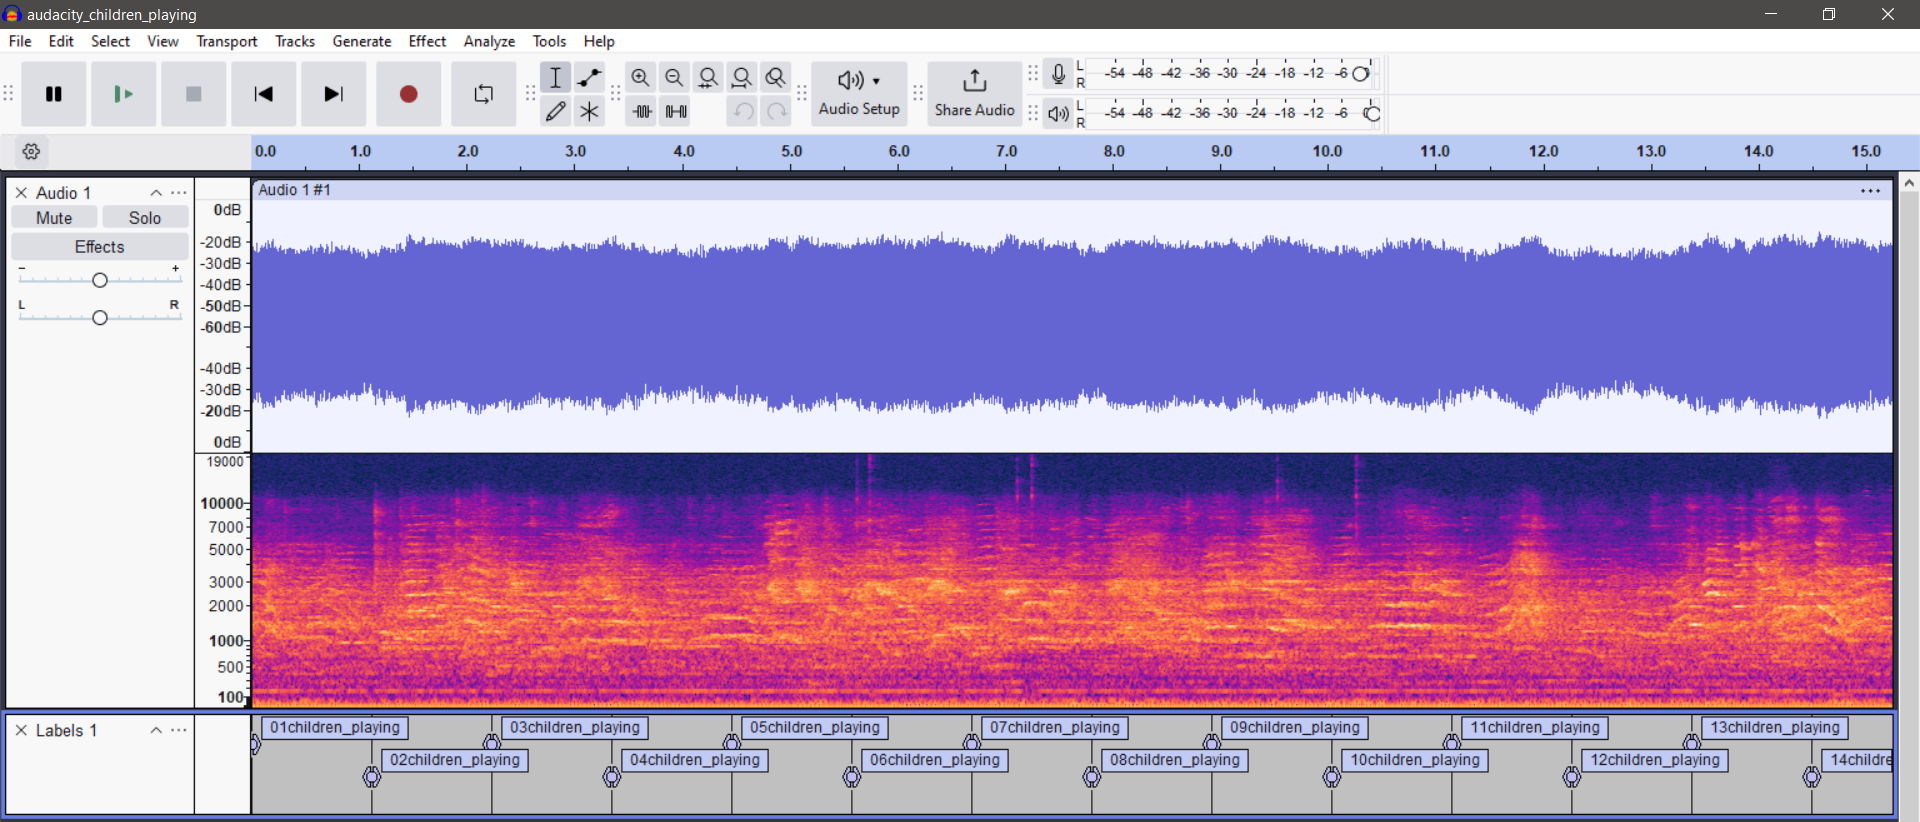

In [30]:
db_children = pd.read_csv(os.path.join(path_exp_children, 'ground_truth', 'children_playing_ground_truth.txt'), sep=",")
db_dog

start      end ground_truth
0      0.000    0.000     dog_bark
1      1.115    1.115     dog_bark
2      2.230    2.230     dog_bark
3      3.345    3.345     dog_bark
4      4.460    4.460     dog_bark
..       ...      ...          ...
102  113.730  113.730     dog_bark
103  114.845  114.845     dog_bark
104  115.960  115.960     dog_bark
105  117.075  117.075     dog_bark
106  118.190  118.190     dog_bark

[107 rows x 3 columns]

In [31]:
db_children['ground_truth'] = db_children['ground_truth'].apply(lambda x: re.sub(r'\d+', '', x))
db_children

start      end      ground_truth
0      0.000    0.000  children_playing
1      1.115    1.115  children_playing
2      2.230    2.230  children_playing
3      3.345    3.345  children_playing
4      4.460    4.460  children_playing
..       ...      ...               ...
102  113.730  113.730  children_playing
103  114.845  114.845  children_playing
104  115.960  115.960  children_playing
105  117.075  117.075  children_playing
106  118.190  118.190  children_playing

[107 rows x 3 columns]

In [32]:
children_ground_truth = db_children['ground_truth'].tolist()
children_ground_truth

['children_playing',
 'children_playing',
 'children_playing',
 'children_playing',
 'children_playing',
 'children_playing',
 'children_playing',
 'children_playing',
 'children_playing',
 'children_playing',
 'children_playing',
 'children_playing',
 'children_playing',
 'children_playing',
 'children_playing',
 'children_playing',
 'children_playing',
 'children_playing',
 'children_playing',
 'children_playing',
 'children_playing',
 'children_playing',
 'children_playing',
 'children_playing',
 'children_playing',
 'children_playing',
 'children_playing',
 'children_playing',
 'children_playing',
 'children_playing',
 'children_playing',
 'children_playing',
 'children_playing',
 'children_playing',
 'children_playing',
 'children_playing',
 'children_playing',
 'children_playing',
 'children_playing',
 'children_playing',
 'children_playing',
 'children_playing',
 'children_playing',
 'children_playing',
 'children_playing',
 'children_playing',
 'children_playing',
 'children_pl

In [33]:
children_ground_truth[0]

'children_playing'

In [34]:
len(children_ground_truth)

107

## children_playing - Predictions from the ESR algorithm

In [35]:
with open(os.path.join(path_exp_children, '_live_audio_predictions_children_playing.csv'), newline='') as f:
    reader        = csv.reader(f)
    data          = list(reader)
    data          = data[0]
    children_pred = [element.strip("'") for element in data]

    # Normalize the number of samples predicted based on the ground truth data
    if len(children_pred) > len(children_ground_truth):
        del children_pred[-(len(children_pred)-len(children_ground_truth)):]
    elif len(children_pred) == len(children_ground_truth):
        pass
    else:
        print(f'Ground truth has more samples ({len(children_ground_truth)}) than prediction samples ({len(children_pred)})')
        print('\nCheck the data.\n')
    
print(children_pred)

['children_playing', 'children_playing', 'children_playing', 'children_playing', 'children_playing', 'children_playing', 'children_playing', 'children_playing', 'children_playing', 'children_playing', 'children_playing', 'children_playing', 'children_playing', 'children_playing', 'children_playing', 'children_playing', 'children_playing', 'children_playing', 'children_playing', 'background', 'children_playing', 'children_playing', 'children_playing', 'children_playing', 'children_playing', 'children_playing', 'children_playing', 'children_playing', 'children_playing', 'children_playing', 'children_playing', 'car_horn', 'children_playing', 'children_playing', 'children_playing', 'children_playing', 'children_playing', 'children_playing', 'children_playing', 'car_horn', 'car_horn', 'children_playing', 'car_horn', 'children_playing', 'car_horn', 'children_playing', 'children_playing', 'children_playing', 'car_horn', 'children_playing', 'children_playing', 'children_playing', 'children_pla

In [36]:
len(children_pred)

107

## children_playing - Classification report

In [37]:
list_unique_truth = set(children_ground_truth)
list_unique_pred  = set(children_pred)
print(list_unique_truth)
print(list_unique_pred)

{'children_playing'}
{'background', 'car_horn', 'children_playing'}


In [38]:
nom_classes_children = sorted(list(list_unique_pred.union(list_unique_truth)))
 
print("The resultant merged list is ")
print(nom_classes_children)

The resultant merged list is 
['background', 'car_horn', 'children_playing']


In [39]:
children1 = Counter(children_ground_truth)
children1

Counter({'children_playing': 107})

In [40]:
children2 = Counter(children_pred)
children2

Counter({'children_playing': 92, 'background': 5, 'car_horn': 10})

In [41]:
children_playing_class_report = metrics.classification_report(children_ground_truth, 
                                                              children_pred,
                                                              output_dict   = False,
                                                              zero_division = 0)
print(children_playing_class_report)

                  precision    recall  f1-score   support

      background       0.00      0.00      0.00         0
        car_horn       0.00      0.00      0.00         0
children_playing       1.00      0.86      0.92       107

        accuracy                           0.86       107
       macro avg       0.33      0.29      0.31       107
    weighted avg       1.00      0.86      0.92       107



In [42]:
children_playing_class_report = metrics.classification_report(children_ground_truth, 
                                                              children_pred,
                                                              output_dict   = True,
                                                              zero_division = 0)

children_playing_class_report_f1 = children_playing_class_report['weighted avg']['f1-score']
print(children_playing_class_report_f1)

0.9246231155778893


In [43]:
metrics.confusion_matrix(children_ground_truth, children_pred)

array([[ 0,  0,  0],
       [ 0,  0,  0],
       [ 5, 10, 92]], dtype=int64)

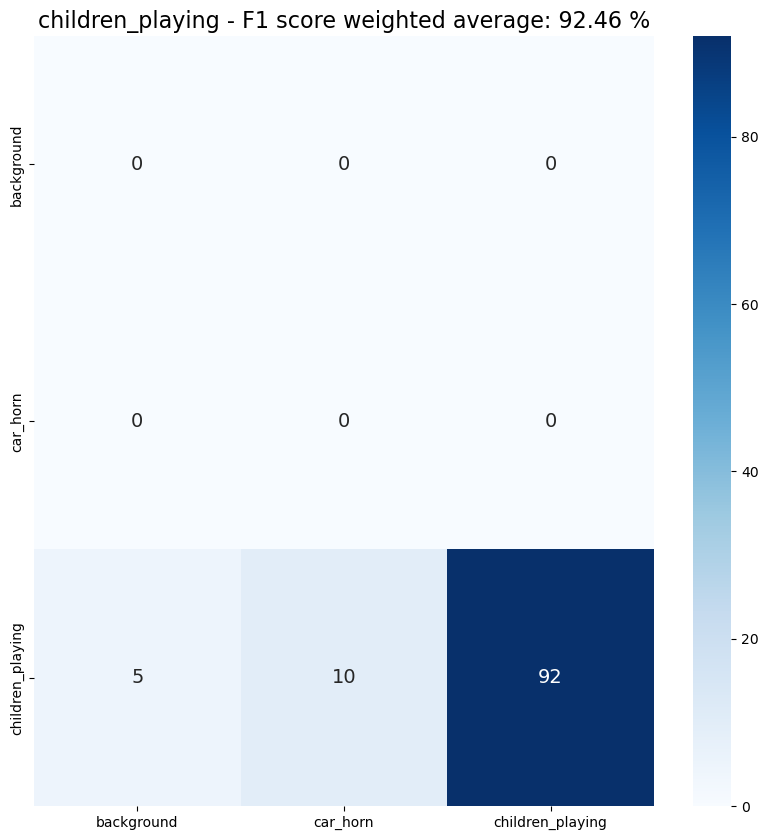

In [44]:
simple_conf_matrix(children_ground_truth, 
                   children_pred, 
                   'children_playing',
                   nom_classes_children,
                   children_playing_class_report_f1)

### Checking the predictions on notebook using the audios recorded during live prediction

In [45]:
children_audio = pred_audio(path_predictions_children)

Number of audio samples...: 107

File name: 030824_160103_output_1.wav
Audio sample 1 duration: 1.1145578231292517 s

File name: 030824_160106_output_2.wav
Audio sample 2 duration: 1.1145578231292517 s

File name: 030824_160106_output_3.wav
Audio sample 3 duration: 1.1145578231292517 s

File name: 030824_160106_output_4.wav
Audio sample 4 duration: 1.1145578231292517 s

File name: 030824_160107_output_5.wav
Audio sample 5 duration: 1.1145578231292517 s

File name: 030824_160108_output_6.wav
Audio sample 6 duration: 1.1145578231292517 s

File name: 030824_160109_output_7.wav
Audio sample 7 duration: 1.1145578231292517 s

File name: 030824_160110_output_8.wav
Audio sample 8 duration: 1.1145578231292517 s

File name: 030824_160111_output_9.wav
Audio sample 9 duration: 1.1145578231292517 s

File name: 030824_160113_output_10.wav
Audio sample 10 duration: 1.1145578231292517 s

File name: 030824_160114_output_11.wav
Audio sample 11 duration: 1.1145578231292517 s

File name: 030824_160115_out

In [46]:
children_audio[0]

array([ 0.48249072,  0.08005895,  0.0631993 , ...,  0.00519357,
        0.0034491 , -0.00162819], dtype=float32)

In [47]:
print(np.array(children_audio).shape)

(107, 24576)


In [48]:
# Checking the previous results for the CNN 2D model considering all audio samples.

ESR_EVAL               = ESR_evaluation_tflite(children_audio[0:len(children_audio)], 'CNN2D', path_modelsVal, path_arrays)
predictions_children   = np.array(ESR_EVAL.predictions)
totalPredTime_children = np.array(ESR_EVAL.totalPredTime)

Audio clip...........: 1
Prediction...........: children_playing
Total predict time:..: 15.1305ms

Audio clip...........: 2
Prediction...........: children_playing
Total predict time:..: 12.8432ms

Audio clip...........: 3
Prediction...........: children_playing
Total predict time:..: 13.0804ms

Audio clip...........: 4
Prediction...........: children_playing
Total predict time:..: 12.9079ms

Audio clip...........: 5
Prediction...........: children_playing
Total predict time:..: 14.3392ms

Audio clip...........: 6
Prediction...........: children_playing
Total predict time:..: 14.6927ms

Audio clip...........: 7
Prediction...........: children_playing
Total predict time:..: 14.1738ms

Audio clip...........: 8
Prediction...........: children_playing
Total predict time:..: 10.8010ms

Audio clip...........: 9
Prediction...........: children_playing
Total predict time:..: 15.3269ms

Audio clip...........: 10
Prediction...........: children_playing
Total predict time:..: 13.5164ms

Audio cli

Audio clip...........: 87
Prediction...........: background
Total predict time:..: 14.4432ms

Audio clip...........: 88
Prediction...........: children_playing
Total predict time:..: 12.1234ms

Audio clip...........: 89
Prediction...........: children_playing
Total predict time:..: 12.0068ms

Audio clip...........: 90
Prediction...........: children_playing
Total predict time:..: 10.9603ms

Audio clip...........: 91
Prediction...........: children_playing
Total predict time:..: 11.2483ms

Audio clip...........: 92
Prediction...........: children_playing
Total predict time:..: 13.0966ms

Audio clip...........: 93
Prediction...........: children_playing
Total predict time:..: 13.8096ms

Audio clip...........: 94
Prediction...........: children_playing
Total predict time:..: 13.5811ms

Audio clip...........: 95
Prediction...........: children_playing
Total predict time:..: 12.5366ms

Audio clip...........: 96
Prediction...........: children_playing
Total predict time:..: 14.1970ms

Audio 

In [49]:
predictions_children

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 2,
       1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2],
      dtype=int64)

In [50]:
nom_classes

['background', 'car_horn', 'children_playing', 'dog_bark', 'silence', 'siren']

In [51]:
predictions_children_cat = np.array(nom_classes)[predictions_children]
predictions_children_cat

array(['children_playing', 'children_playing', 'children_playing',
       'children_playing', 'children_playing', 'children_playing',
       'children_playing', 'children_playing', 'children_playing',
       'children_playing', 'children_playing', 'children_playing',
       'children_playing', 'children_playing', 'children_playing',
       'children_playing', 'children_playing', 'children_playing',
       'children_playing', 'background', 'children_playing',
       'children_playing', 'children_playing', 'children_playing',
       'children_playing', 'children_playing', 'children_playing',
       'children_playing', 'children_playing', 'children_playing',
       'children_playing', 'car_horn', 'children_playing',
       'children_playing', 'children_playing', 'children_playing',
       'children_playing', 'children_playing', 'children_playing',
       'car_horn', 'car_horn', 'children_playing', 'car_horn',
       'children_playing', 'car_horn', 'children_playing',
       'children_play

In [52]:
np.array_equal(children_pred, predictions_children_cat)

True

***

## car_horn - Ground truth from Audacity

**Manually labeled**

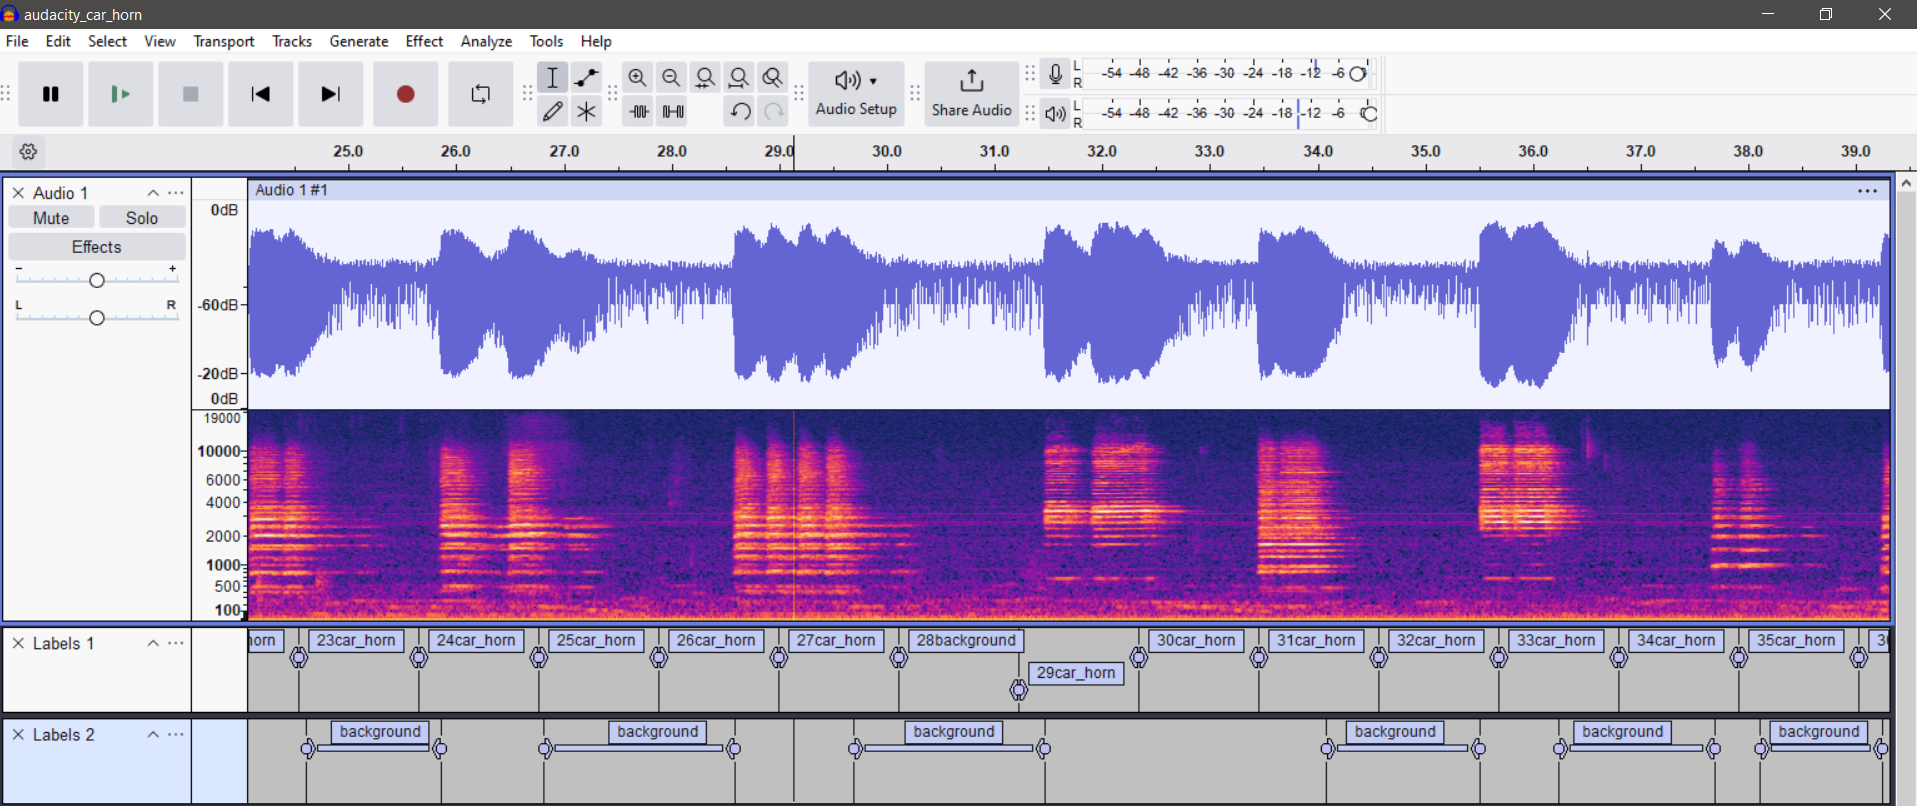

In [53]:
db_car_horn = pd.read_csv(os.path.join(path_exp_car_horn, 'ground_truth', 'car_horn_ground_truth.txt'), sep=",")
db_car_horn

start      end ground_truth
0      0.000    0.000   01car_horn
1      1.115    1.115   02car_horn
2      2.230    2.230   03car_horn
3      3.345    3.345   04car_horn
4      4.460    4.460   05car_horn
..       ...      ...          ...
102  113.730  113.730  103car_horn
103  114.845  114.845  104car_horn
104  115.960  115.960  105car_horn
105  117.075  117.075  106car_horn
106  118.190  118.190  107car_horn

[107 rows x 3 columns]

In [54]:
db_car_horn['ground_truth'] = db_car_horn['ground_truth'].apply(lambda x: re.sub(r'\d+', '', x))
db_car_horn

start      end ground_truth
0      0.000    0.000     car_horn
1      1.115    1.115     car_horn
2      2.230    2.230     car_horn
3      3.345    3.345     car_horn
4      4.460    4.460     car_horn
..       ...      ...          ...
102  113.730  113.730     car_horn
103  114.845  114.845     car_horn
104  115.960  115.960     car_horn
105  117.075  117.075     car_horn
106  118.190  118.190     car_horn

[107 rows x 3 columns]

In [55]:
car_horn_ground_truth = db_car_horn['ground_truth'].tolist()
car_horn_ground_truth

['car_horn',
 'car_horn',
 'car_horn',
 'car_horn',
 'car_horn',
 'car_horn',
 'car_horn',
 'car_horn',
 'car_horn',
 'car_horn',
 'car_horn',
 'car_horn',
 'car_horn',
 'car_horn',
 'car_horn',
 'car_horn',
 'car_horn',
 'background',
 'car_horn',
 'car_horn',
 'car_horn',
 'car_horn',
 'car_horn',
 'car_horn',
 'car_horn',
 'car_horn',
 'car_horn',
 'car_horn',
 'car_horn',
 'car_horn',
 'car_horn',
 'car_horn',
 'car_horn',
 'car_horn',
 'car_horn',
 'car_horn',
 'car_horn',
 'car_horn',
 'car_horn',
 'car_horn',
 'car_horn',
 'car_horn',
 'car_horn',
 'car_horn',
 'car_horn',
 'car_horn',
 'car_horn',
 'car_horn',
 'car_horn',
 'car_horn',
 'car_horn',
 'car_horn',
 'car_horn',
 'car_horn',
 'background',
 'car_horn',
 'car_horn',
 'background',
 'car_horn',
 'car_horn',
 'background',
 'car_horn',
 'car_horn',
 'car_horn',
 'car_horn',
 'car_horn',
 'car_horn',
 'car_horn',
 'car_horn',
 'car_horn',
 'car_horn',
 'car_horn',
 'car_horn',
 'car_horn',
 'car_horn',
 'car_horn',
 'ca

In [56]:
car_horn_ground_truth[0]

'car_horn'

In [57]:
len(car_horn_ground_truth)

107

## car_horn - Predictions from the ESR algorithm

In [58]:
with open(os.path.join(path_exp_car_horn, '_live_audio_predictions_car_horn.csv'), newline='') as f:
    reader        = csv.reader(f)
    data          = list(reader)
    data          = data[0]
    car_horn_pred = [element.strip("'") for element in data]

    # Normalize the number of samples predicted based on the ground truth data
    if len(car_horn_pred) > len(car_horn_ground_truth):
        del car_horn_pred[-(len(car_horn_pred)-len(car_horn_ground_truth)):]
    elif len(car_horn_pred) == len(car_horn_ground_truth):
        pass
    else:
        print(f'Ground truth has more samples ({len(car_horn_ground_truth)}) than prediction samples ({len(car_horn_pred)})')
        print('\nCheck the data.\n')
    
print(car_horn_pred)

['car_horn', 'car_horn', 'car_horn', 'car_horn', 'car_horn', 'car_horn', 'car_horn', 'car_horn', 'car_horn', 'car_horn', 'car_horn', 'car_horn', 'car_horn', 'car_horn', 'car_horn', 'children_playing', 'car_horn', 'background', 'car_horn', 'car_horn', 'car_horn', 'background', 'car_horn', 'children_playing', 'children_playing', 'car_horn', 'car_horn', 'car_horn', 'car_horn', 'children_playing', 'car_horn', 'car_horn', 'children_playing', 'car_horn', 'background', 'car_horn', 'car_horn', 'car_horn', 'car_horn', 'car_horn', 'car_horn', 'car_horn', 'background', 'background', 'car_horn', 'car_horn', 'car_horn', 'car_horn', 'car_horn', 'car_horn', 'car_horn', 'car_horn', 'car_horn', 'car_horn', 'background', 'car_horn', 'car_horn', 'background', 'car_horn', 'car_horn', 'background', 'background', 'car_horn', 'car_horn', 'car_horn', 'car_horn', 'car_horn', 'car_horn', 'car_horn', 'car_horn', 'car_horn', 'car_horn', 'car_horn', 'car_horn', 'car_horn', 'background', 'car_horn', 'car_horn', 'ca

In [59]:
len(car_horn_pred)

107

## car_horn - Classification report

In [60]:
list_unique_truth = set(car_horn_ground_truth)
list_unique_pred  = set(car_horn_pred)
print(list_unique_truth)
print(list_unique_pred)

{'background', 'car_horn'}
{'background', 'car_horn', 'siren', 'children_playing'}


In [61]:
nom_classes_car_horn = sorted(list(list_unique_pred.union(list_unique_truth)))
 
print("The resultant merged list is ")
print(nom_classes_car_horn)

The resultant merged list is 
['background', 'car_horn', 'children_playing', 'siren']


In [62]:
car_horn1 = Counter(car_horn_ground_truth)
car_horn1

Counter({'car_horn': 100, 'background': 7})

In [63]:
car_horn2 = Counter(car_horn_pred)
car_horn2

Counter({'car_horn': 84, 'children_playing': 6, 'background': 16, 'siren': 1})

In [64]:
car_horn_class_report = metrics.classification_report(car_horn_ground_truth, 
                                                      car_horn_pred,
                                                      output_dict   = False,
                                                      zero_division = 0)
print(car_horn_class_report)

                  precision    recall  f1-score   support

      background       0.44      1.00      0.61         7
        car_horn       1.00      0.84      0.91       100
children_playing       0.00      0.00      0.00         0
           siren       0.00      0.00      0.00         0

        accuracy                           0.85       107
       macro avg       0.36      0.46      0.38       107
    weighted avg       0.96      0.85      0.89       107



In [65]:
car_horn_class_report = metrics.classification_report(car_horn_ground_truth, 
                                                      car_horn_pred,
                                                      output_dict   = True,
                                                      zero_division = 0)

car_horn_class_report_f1 = car_horn_class_report['weighted avg']['f1-score']
print(car_horn_class_report_f1)

0.8931328728159286


In [66]:
metrics.confusion_matrix(car_horn_ground_truth, car_horn_pred)

array([[ 7,  0,  0,  0],
       [ 9, 84,  6,  1],
       [ 0,  0,  0,  0],
       [ 0,  0,  0,  0]], dtype=int64)

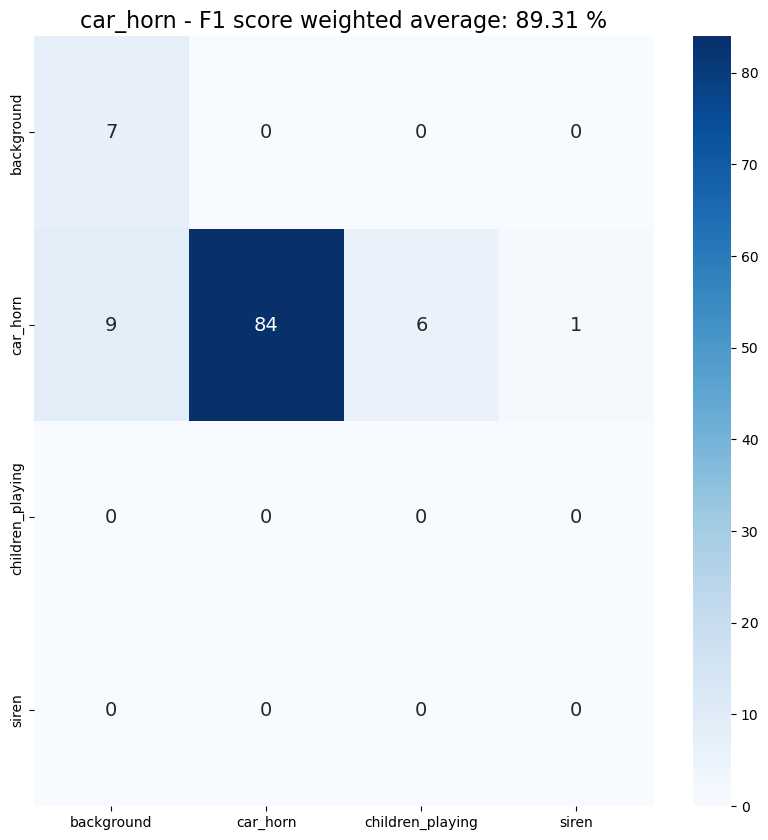

In [67]:
simple_conf_matrix(car_horn_ground_truth, 
                   car_horn_pred, 
                   'car_horn',
                   nom_classes_car_horn,
                   car_horn_class_report_f1)

### Checking the predictions on notebook using the audios recorded during live prediction

In [68]:
car_horn_audio = pred_audio(path_predictions_car_horn)

Number of audio samples...: 107

File name: 040824_080442_output_1.wav
Audio sample 1 duration: 1.1145578231292517 s

File name: 040824_080446_output_2.wav
Audio sample 2 duration: 1.1145578231292517 s

File name: 040824_080446_output_3.wav
Audio sample 3 duration: 1.1145578231292517 s

File name: 040824_080446_output_4.wav
Audio sample 4 duration: 1.1145578231292517 s

File name: 040824_080447_output_5.wav
Audio sample 5 duration: 1.1145578231292517 s

File name: 040824_080448_output_6.wav
Audio sample 6 duration: 1.1145578231292517 s

File name: 040824_080449_output_7.wav
Audio sample 7 duration: 1.1145578231292517 s

File name: 040824_080450_output_8.wav
Audio sample 8 duration: 1.1145578231292517 s

File name: 040824_080451_output_9.wav
Audio sample 9 duration: 1.1145578231292517 s

File name: 040824_080452_output_10.wav
Audio sample 10 duration: 1.1145578231292517 s

File name: 040824_080453_output_11.wav
Audio sample 11 duration: 1.1145578231292517 s

File name: 040824_080454_out

In [69]:
car_horn_audio[0]

array([0.0029055 , 0.01668912, 0.03995582, ..., 0.02388506, 0.02087395,
       0.01991488], dtype=float32)

In [70]:
print(np.array(car_horn_audio).shape)

(107, 24576)


In [71]:
# Checking the previous results for the CNN 2D model considering all audio samples.

ESR_EVAL               = ESR_evaluation_tflite(car_horn_audio[0:len(car_horn_audio)], 'CNN2D', path_modelsVal, path_arrays)
predictions_car_horn   = np.array(ESR_EVAL.predictions)
totalPredTime_car_horn = np.array(ESR_EVAL.totalPredTime)

Audio clip...........: 1
Prediction...........: car_horn
Total predict time:..: 14.7809ms

Audio clip...........: 2
Prediction...........: car_horn
Total predict time:..: 12.0834ms

Audio clip...........: 3
Prediction...........: car_horn
Total predict time:..: 12.5630ms

Audio clip...........: 4
Prediction...........: car_horn
Total predict time:..: 13.9825ms

Audio clip...........: 5
Prediction...........: car_horn
Total predict time:..: 12.3472ms

Audio clip...........: 6
Prediction...........: car_horn
Total predict time:..: 10.3560ms

Audio clip...........: 7
Prediction...........: car_horn
Total predict time:..: 12.4220ms

Audio clip...........: 8
Prediction...........: car_horn
Total predict time:..: 11.4395ms

Audio clip...........: 9
Prediction...........: car_horn
Total predict time:..: 13.7327ms

Audio clip...........: 10
Prediction...........: car_horn
Total predict time:..: 11.0111ms

Audio clip...........: 11
Prediction...........: car_horn
Total predict time:..: 12.1812m

Audio clip...........: 101
Prediction...........: background
Total predict time:..: 13.7053ms

Audio clip...........: 102
Prediction...........: car_horn
Total predict time:..: 11.4157ms

Audio clip...........: 103
Prediction...........: car_horn
Total predict time:..: 12.4189ms

Audio clip...........: 104
Prediction...........: car_horn
Total predict time:..: 10.6338ms

Audio clip...........: 105
Prediction...........: car_horn
Total predict time:..: 13.7782ms

Audio clip...........: 106
Prediction...........: car_horn
Total predict time:..: 13.0401ms

Audio clip...........: 107
Prediction...........: car_horn
Total predict time:..: 15.2201ms



In [72]:
predictions_car_horn

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 0,
       1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 5, 1, 1, 1, 1, 0, 1, 1, 2, 1, 0, 1, 1, 1, 1, 1, 1],
      dtype=int64)

In [73]:
nom_classes

['background', 'car_horn', 'children_playing', 'dog_bark', 'silence', 'siren']

In [74]:
predictions_car_horn_cat = np.array(nom_classes)[predictions_car_horn]
predictions_car_horn_cat

array(['car_horn', 'car_horn', 'car_horn', 'car_horn', 'car_horn',
       'car_horn', 'car_horn', 'car_horn', 'car_horn', 'car_horn',
       'car_horn', 'car_horn', 'car_horn', 'car_horn', 'car_horn',
       'children_playing', 'car_horn', 'background', 'car_horn',
       'car_horn', 'car_horn', 'background', 'car_horn',
       'children_playing', 'children_playing', 'car_horn', 'car_horn',
       'car_horn', 'car_horn', 'children_playing', 'car_horn', 'car_horn',
       'children_playing', 'car_horn', 'background', 'car_horn',
       'car_horn', 'car_horn', 'car_horn', 'car_horn', 'car_horn',
       'car_horn', 'background', 'background', 'car_horn', 'car_horn',
       'car_horn', 'car_horn', 'car_horn', 'car_horn', 'car_horn',
       'car_horn', 'car_horn', 'car_horn', 'background', 'car_horn',
       'car_horn', 'background', 'car_horn', 'car_horn', 'background',
       'background', 'car_horn', 'car_horn', 'car_horn', 'car_horn',
       'car_horn', 'car_horn', 'car_horn', 'car_horn

In [75]:
np.array_equal(car_horn_pred, predictions_car_horn_cat)

True

***

## siren - Ground truth from Audacity

**Manually labeled**

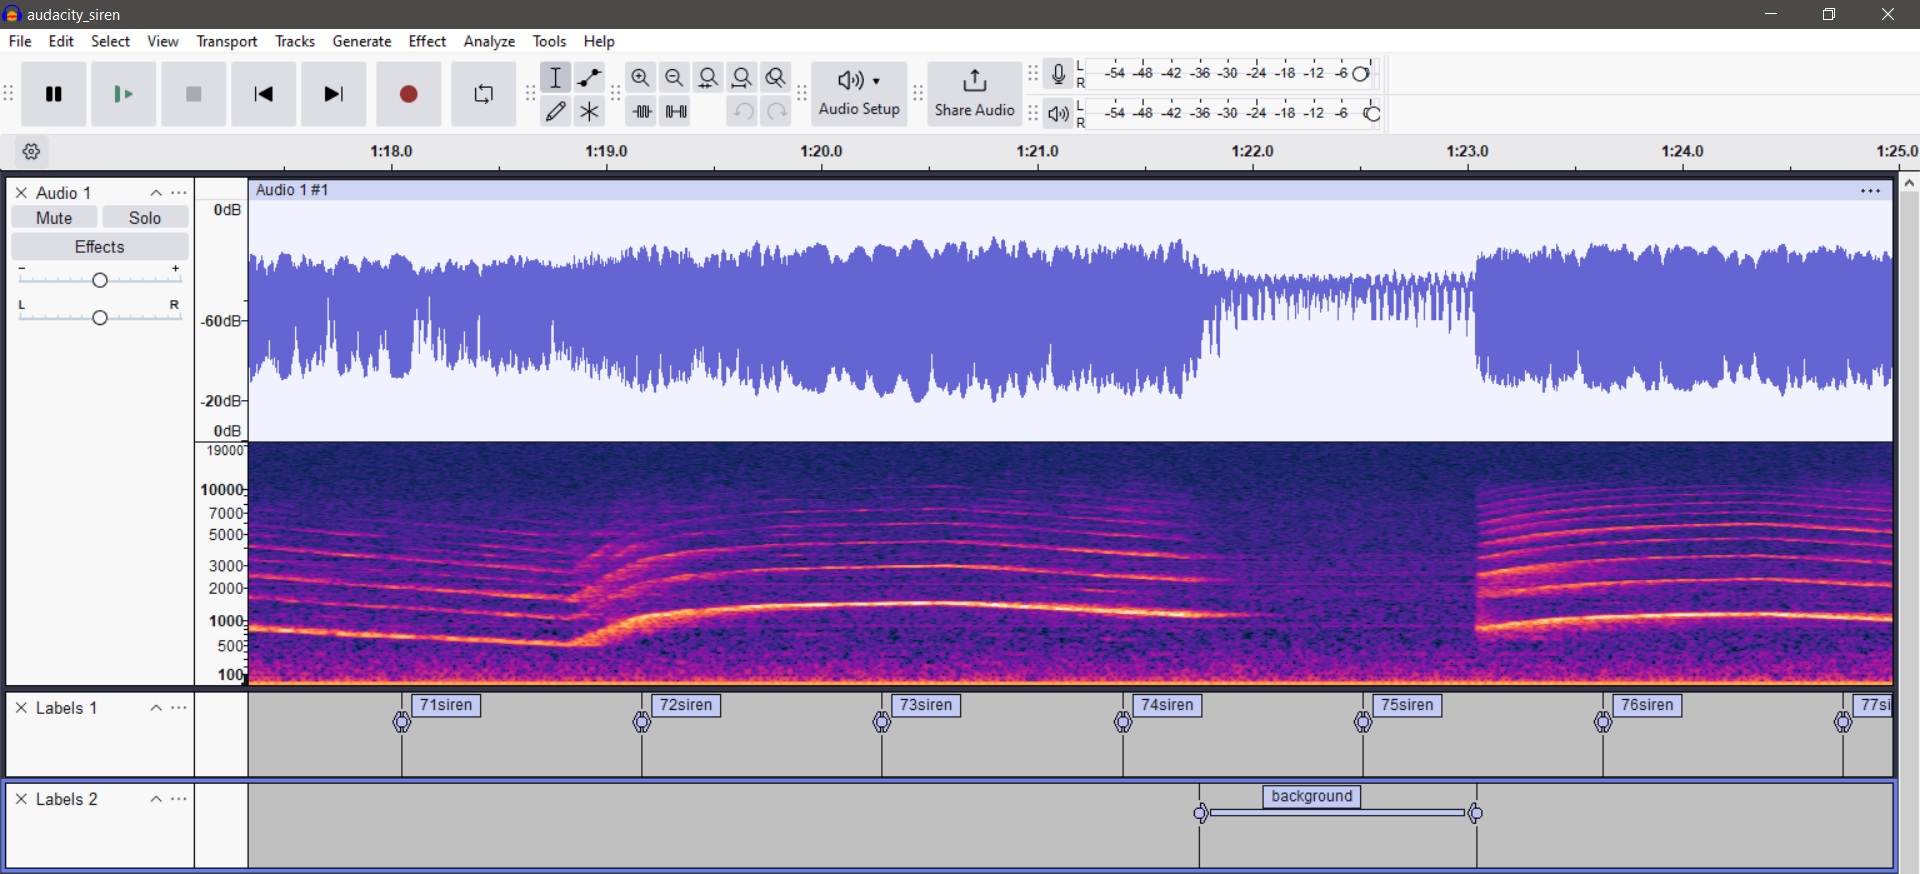

In [76]:
db_car_siren = pd.read_csv(os.path.join(path_exp_siren, 'ground_truth', 'siren_ground_truth.txt'), sep=",")
db_car_siren

start      end ground_truth
0      0.000    0.000      01siren
1      1.115    1.115      02siren
2      2.230    2.230      03siren
3      3.345    3.345      04siren
4      4.460    4.460      05siren
..       ...      ...          ...
102  113.730  113.730     103siren
103  114.845  114.845     104siren
104  115.960  115.960     105siren
105  117.075  117.075     106siren
106  118.190  118.190     107siren

[107 rows x 3 columns]

In [77]:
db_car_siren['ground_truth'] = db_car_siren['ground_truth'].apply(lambda x: re.sub(r'\d+', '', x))
db_car_siren

start      end ground_truth
0      0.000    0.000        siren
1      1.115    1.115        siren
2      2.230    2.230        siren
3      3.345    3.345        siren
4      4.460    4.460        siren
..       ...      ...          ...
102  113.730  113.730        siren
103  114.845  114.845        siren
104  115.960  115.960        siren
105  117.075  117.075        siren
106  118.190  118.190        siren

[107 rows x 3 columns]

In [78]:
siren_ground_truth = db_car_siren['ground_truth'].tolist()
siren_ground_truth

['siren',
 'siren',
 'siren',
 'siren',
 'siren',
 'siren',
 'siren',
 'siren',
 'siren',
 'siren',
 'siren',
 'siren',
 'siren',
 'siren',
 'siren',
 'siren',
 'siren',
 'siren',
 'siren',
 'siren',
 'siren',
 'siren',
 'siren',
 'siren',
 'siren',
 'siren',
 'siren',
 'siren',
 'siren',
 'siren',
 'siren',
 'siren',
 'siren',
 'siren',
 'siren',
 'siren',
 'siren',
 'siren',
 'siren',
 'siren',
 'siren',
 'siren',
 'siren',
 'siren',
 'siren',
 'siren',
 'siren',
 'siren',
 'siren',
 'siren',
 'siren',
 'siren',
 'siren',
 'siren',
 'siren',
 'siren',
 'siren',
 'siren',
 'siren',
 'siren',
 'siren',
 'siren',
 'siren',
 'siren',
 'siren',
 'background',
 'background',
 'siren',
 'siren',
 'siren',
 'siren',
 'siren',
 'siren',
 'siren',
 'siren',
 'siren',
 'siren',
 'siren',
 'siren',
 'siren',
 'siren',
 'siren',
 'siren',
 'siren',
 'siren',
 'siren',
 'siren',
 'siren',
 'siren',
 'siren',
 'siren',
 'siren',
 'siren',
 'siren',
 'siren',
 'siren',
 'siren',
 'siren',
 'siren',


In [79]:
siren_ground_truth[0]

'siren'

In [80]:
len(siren_ground_truth)

107

## siren - Predictions from the ESR algorithm

In [81]:
with open(os.path.join(path_exp_siren, '_live_audio_predictions_siren.csv'), newline='') as f:
    reader     = csv.reader(f)
    data       = list(reader)
    data       = data[0]
    siren_pred = [element.strip("'") for element in data]

    # Normalize the number of samples predicted based on the ground truth data
    if len(siren_pred) > len(siren_ground_truth):
        del siren_pred[-(len(siren_pred)-len(siren_ground_truth)):]
    elif len(siren_pred) == len(siren_ground_truth):
        pass
    else:
        print(f'Ground truth has more samples ({len(car_horn_ground_truth)}) than prediction samples ({len(siren_pred)})')
        print('\nCheck the data.\n')
    
print(siren_pred)

['siren', 'siren', 'siren', 'siren', 'siren', 'siren', 'siren', 'siren', 'siren', 'siren', 'siren', 'siren', 'siren', 'siren', 'siren', 'children_playing', 'siren', 'children_playing', 'siren', 'siren', 'siren', 'siren', 'siren', 'siren', 'children_playing', 'siren', 'siren', 'siren', 'siren', 'siren', 'siren', 'siren', 'siren', 'siren', 'siren', 'siren', 'siren', 'siren', 'siren', 'siren', 'siren', 'siren', 'siren', 'siren', 'siren', 'siren', 'siren', 'siren', 'siren', 'siren', 'siren', 'siren', 'siren', 'siren', 'siren', 'siren', 'siren', 'children_playing', 'siren', 'siren', 'siren', 'siren', 'siren', 'siren', 'dog_bark', 'background', 'background', 'siren', 'siren', 'siren', 'siren', 'siren', 'siren', 'children_playing', 'children_playing', 'siren', 'siren', 'siren', 'siren', 'siren', 'siren', 'siren', 'siren', 'siren', 'siren', 'siren', 'siren', 'siren', 'children_playing', 'siren', 'siren', 'siren', 'siren', 'siren', 'siren', 'siren', 'children_playing', 'siren', 'siren', 'siren'

In [82]:
len(siren_pred)

107

## siren - Classification report

In [83]:
list_unique_truth = set(siren_ground_truth)
list_unique_pred  = set(siren_pred)
print(list_unique_truth)
print(list_unique_pred)

{'background', 'siren'}
{'dog_bark', 'siren', 'children_playing', 'background'}


In [84]:
nom_classes_siren = sorted(list(list_unique_pred.union(list_unique_truth)))
 
print("The resultant merged list is ")
print(nom_classes_siren)

The resultant merged list is 
['background', 'children_playing', 'dog_bark', 'siren']


In [85]:
siren1 = Counter(siren_ground_truth)
siren1

Counter({'siren': 105, 'background': 2})

In [86]:
siren2 = Counter(siren_pred)
siren2

Counter({'siren': 95, 'children_playing': 8, 'dog_bark': 1, 'background': 3})

In [87]:
siren_class_report = metrics.classification_report(siren_ground_truth, 
                                                   siren_pred,
                                                   output_dict   = False,
                                                   zero_division = 0)
print(siren_class_report)

                  precision    recall  f1-score   support

      background       0.67      1.00      0.80         2
children_playing       0.00      0.00      0.00         0
        dog_bark       0.00      0.00      0.00         0
           siren       1.00      0.90      0.95       105

        accuracy                           0.91       107
       macro avg       0.42      0.48      0.44       107
    weighted avg       0.99      0.91      0.95       107



In [88]:
siren_class_report = metrics.classification_report(siren_ground_truth, 
                                                   siren_pred,
                                                   output_dict   = True,
                                                   zero_division = 0)

siren_class_report_f1 = siren_class_report['weighted avg']['f1-score']
print(siren_class_report_f1)

0.9471962616822429


In [89]:
metrics.confusion_matrix(siren_ground_truth, siren_pred)

array([[ 2,  0,  0,  0],
       [ 0,  0,  0,  0],
       [ 0,  0,  0,  0],
       [ 1,  8,  1, 95]], dtype=int64)

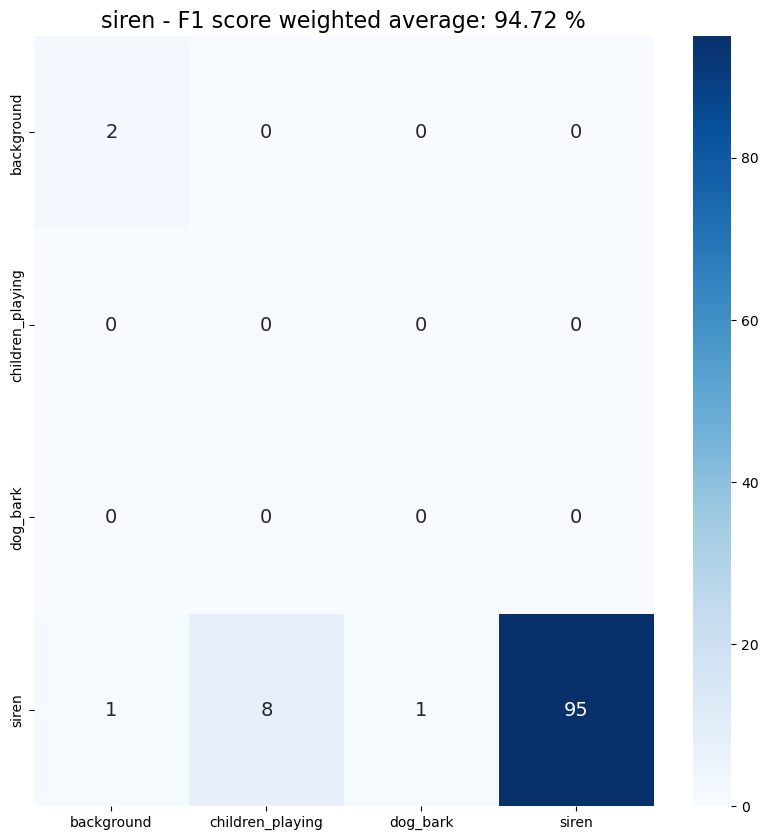

In [90]:
simple_conf_matrix(siren_ground_truth, 
                   siren_pred, 
                   'siren',
                   nom_classes_siren,
                   siren_class_report_f1)

### Checking the predictions on notebook using the audios recorded during live prediction

In [91]:
siren_audio = pred_audio(path_predictions_siren)

Number of audio samples...: 107

File name: 040824_081913_output_1.wav
Audio sample 1 duration: 1.1145578231292517 s

File name: 040824_081917_output_2.wav
Audio sample 2 duration: 1.1145578231292517 s

File name: 040824_081917_output_3.wav
Audio sample 3 duration: 1.1145578231292517 s

File name: 040824_081917_output_4.wav
Audio sample 4 duration: 1.1145578231292517 s

File name: 040824_081918_output_5.wav
Audio sample 5 duration: 1.1145578231292517 s

File name: 040824_081919_output_6.wav
Audio sample 6 duration: 1.1145578231292517 s

File name: 040824_081920_output_7.wav
Audio sample 7 duration: 1.1145578231292517 s

File name: 040824_081921_output_8.wav
Audio sample 8 duration: 1.1145578231292517 s

File name: 040824_081922_output_9.wav
Audio sample 9 duration: 1.1145578231292517 s

File name: 040824_081923_output_10.wav
Audio sample 10 duration: 1.1145578231292517 s

File name: 040824_081924_output_11.wav
Audio sample 11 duration: 1.1145578231292517 s

File name: 040824_081925_out

In [92]:
siren_audio[0]

array([0.01646154, 0.0842272 , 0.12211696, ..., 0.0718299 , 0.08460368,
       0.11398633], dtype=float32)

In [93]:
print(np.array(siren_audio).shape)

(107, 24576)


In [94]:
# Checking the previous results for the CNN 2D model considering all audio samples.

ESR_EVAL            = ESR_evaluation_tflite(siren_audio[0:len(siren_audio)], 'CNN2D', path_modelsVal, path_arrays)
predictions_siren   = np.array(ESR_EVAL.predictions)
totalPredTime_siren = np.array(ESR_EVAL.totalPredTime)

Audio clip...........: 1
Prediction...........: siren
Total predict time:..: 14.8955ms

Audio clip...........: 2
Prediction...........: siren
Total predict time:..: 11.8998ms

Audio clip...........: 3
Prediction...........: siren
Total predict time:..: 10.9461ms

Audio clip...........: 4
Prediction...........: siren
Total predict time:..: 12.3025ms

Audio clip...........: 5
Prediction...........: siren
Total predict time:..: 10.6886ms

Audio clip...........: 6
Prediction...........: siren
Total predict time:..: 13.2772ms

Audio clip...........: 7
Prediction...........: siren
Total predict time:..: 13.5129ms

Audio clip...........: 8
Prediction...........: siren
Total predict time:..: 13.9303ms

Audio clip...........: 9
Prediction...........: siren
Total predict time:..: 12.9641ms

Audio clip...........: 10
Prediction...........: siren
Total predict time:..: 13.6867ms

Audio clip...........: 11
Prediction...........: siren
Total predict time:..: 13.1152ms

Audio clip...........: 12
Pred

Prediction...........: children_playing
Total predict time:..: 11.3880ms

Audio clip...........: 98
Prediction...........: siren
Total predict time:..: 14.4774ms

Audio clip...........: 99
Prediction...........: siren
Total predict time:..: 14.9057ms

Audio clip...........: 100
Prediction...........: siren
Total predict time:..: 13.6451ms

Audio clip...........: 101
Prediction...........: siren
Total predict time:..: 11.9091ms

Audio clip...........: 102
Prediction...........: siren
Total predict time:..: 11.8815ms

Audio clip...........: 103
Prediction...........: siren
Total predict time:..: 12.8205ms

Audio clip...........: 104
Prediction...........: background
Total predict time:..: 11.9240ms

Audio clip...........: 105
Prediction...........: siren
Total predict time:..: 11.5689ms

Audio clip...........: 106
Prediction...........: siren
Total predict time:..: 11.3513ms

Audio clip...........: 107
Prediction...........: siren
Total predict time:..: 12.8587ms



In [95]:
predictions_siren

array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 2, 5, 2, 5, 5, 5, 5,
       5, 5, 2, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 2, 5, 5, 5, 5, 5, 5, 3, 0,
       0, 5, 5, 5, 5, 5, 5, 2, 2, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       2, 5, 5, 5, 5, 5, 5, 5, 2, 5, 5, 5, 5, 5, 5, 0, 5, 5, 5],
      dtype=int64)

In [96]:
nom_classes

['background', 'car_horn', 'children_playing', 'dog_bark', 'silence', 'siren']

In [97]:
predictions_siren_cat = np.array(nom_classes)[predictions_siren]
predictions_siren_cat

array(['siren', 'siren', 'siren', 'siren', 'siren', 'siren', 'siren',
       'siren', 'siren', 'siren', 'siren', 'siren', 'siren', 'siren',
       'siren', 'children_playing', 'siren', 'children_playing', 'siren',
       'siren', 'siren', 'siren', 'siren', 'siren', 'children_playing',
       'siren', 'siren', 'siren', 'siren', 'siren', 'siren', 'siren',
       'siren', 'siren', 'siren', 'siren', 'siren', 'siren', 'siren',
       'siren', 'siren', 'siren', 'siren', 'siren', 'siren', 'siren',
       'siren', 'siren', 'siren', 'siren', 'siren', 'siren', 'siren',
       'siren', 'siren', 'siren', 'siren', 'children_playing', 'siren',
       'siren', 'siren', 'siren', 'siren', 'siren', 'dog_bark',
       'background', 'background', 'siren', 'siren', 'siren', 'siren',
       'siren', 'siren', 'children_playing', 'children_playing', 'siren',
       'siren', 'siren', 'siren', 'siren', 'siren', 'siren', 'siren',
       'siren', 'siren', 'siren', 'siren', 'siren', 'children_playing',
       'sir

In [98]:
np.array_equal(siren_pred, predictions_siren_cat)

True

# End of the notebook